<a href="https://colab.research.google.com/github/vivek22-11/CODSOFT/blob/main/CodSoft_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**:-Vivek Vilas Kadam

**Batch**:-May

**Domain**:-Datascience

**Title**:-MOVIE RATING PREDICTION WITH PYTHON

**TASK 2**

MOVIE RATING PREDICTION WITH PYTHON

Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.
Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [ ]:
rom sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/IMDb Movies India.csv",encoding='latin1')
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
def analysis(data):
    print(f'Data Size  : {data.size}')
    print(f'\nShape of the dataframe: {data.shape[0]} rows and {data.shape[1]} columns')
    print("*" * 100)
    print("\nDisplaying the initial records of the dataframe:")
    display(data.head())
    print("*" * 100)
    print("\nListing all the columns in the dataframe:")
    display(data.columns)
    print("*" * 100)
    print("\nTotal number of unique values in each column:\n")
    display(data.nunique())
    print("*" * 110)
    print("\nSome important information about the dataframe:\n")
    display(data.info())
    print("*" * 110)
    print("\nStatistical measures about the data:")
    display(data.describe())
    print("*" * 100)

data = df
analysis(df)

Data Size  : 155090

Shape of the dataframe: 15509 rows and 10 columns
****************************************************************************************************

Displaying the initial records of the dataframe:


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


****************************************************************************************************

Listing all the columns in the dataframe:


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

****************************************************************************************************

Total number of unique values in each column:



Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

**************************************************************************************************************

Some important information about the dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


None

**************************************************************************************************************

Statistical measures about the data:


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


****************************************************************************************************


In [ ]:
df.describe(include = 'O')

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7920,14984,13892,13125,12365
unique,13838,102,182,485,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,227,58,158,83,91


In [ ]:
df.duplicated().sum()

6

In [ ]:
df[df.duplicated()]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1250,Arab Ka Sona - Abu Kaalia,(1979),NaN,Action,NaN,NaN,Master Bhagwan,Meena Rai,Dara Singh,NaN
1769,Balidan,(1992),NaN,Drama,NaN,NaN,NaN,NaN,NaN,NaN
4723,First Time - Pehli Baar,(2009),NaN,NaN,NaN,NaN,Raja Bundela,Zeenat Aman,Nitin Arora,Raj Babbar
9713,Musafir,NaN,NaN,Thriller,NaN,NaN,Shiva Dagar,NaN,NaN,NaN
13069,Shivani,(2019),NaN,Crime,NaN,NaN,Ugresh Prasad Ujala,Santosh,NaN,NaN
13308,Slumdog Karodpati,(2019),118 min,Thriller,NaN,NaN,Rajesh Patole,Udhav Garje,Rahul Gavane,Govindrao


In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
duplicate = df.groupby(['Name', 'Year']).filter(lambda x: len(x) > 1)
duplicate.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
135,A Ballad of Maladies,(2016),86 min,"Documentary, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav,NaN,NaN
136,A Ballad of Maladies,(2016),86 min,"Documentary, History, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav,NaN,NaN
585,Achanak,(1988),NaN,Thriller,NaN,NaN,Rakesh Kashyap,Om Puri,Kunickaa Sadanand,Kanwaljit Singh
586,Achanak,(1988),NaN,Drama,NaN,NaN,Kavi Raz,Alka,Amarjeet Kaur,Kavi Raz
953,Amrit,(1941),153 min,NaN,NaN,NaN,Master Vinayak,Dada Salvi,Baburao Pendharkar,Lalita Pawar
954,Amrit,(1941),162 min,NaN,NaN,NaN,Master Vinayak,Dada Salvi,Baburao Pendharkar,Lalita Pawar
2654,Campus,(2000),NaN,Romance,NaN,NaN,Shefali Shah,Aryan Vaid,Arif Zakaria,NaN
2655,Campus,(2000),NaN,Romance,NaN,NaN,NaN,NaN,NaN,NaN
4133,Dost,(1944),NaN,Drama,6.0,6,Shaukat Hussain Rizvi,Maya Banerjee,Husn Banu,Kanhaiyalal Chaturvedi
4137,Dost,(1944),NaN,Drama,NaN,NaN,Sm Yusuf,NaN,NaN,NaN


In [ ]:
# Dropping the duplicated values by Name and Year
df = df.drop_duplicates(subset=['Name','Year'], keep=False)
df.shape

(15467, 10)

In [ ]:
# Checking null values in the dataframe
def missing_values_percent(dataframe):
    missing_values = dataframe.isna().sum()
    percentage_missing = (missing_values / len(dataframe) * 100).round(2)

    result_movie = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
    result_movie['Percentage'] = result_movie['Percentage'].astype(str) + '%'

    return result_movie


result = missing_values_percent(df)
result

,Missing Values,Percentage
Name,0,0.0%
Year,527,3.41%
Duration,8240,53.27%
Genre,1866,12.06%
Rating,7560,48.88%
Votes,7559,48.87%
Director,522,3.37%
Actor 1,1609,10.4%
Actor 2,2373,15.34%
Actor 3,3126,20.21%


In [ ]:
# Locating missing values in the entire row except name column
nulls = df[df.iloc[:, 1:9].isna().all(axis=1)]
nulls.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1836,Bang Bang Reloaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,Battle of bittora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3403,Dancing Dad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3807,Dial 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4271,Durga Rani Singh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8669,Main Hoon Kaun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9600,Mughal Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


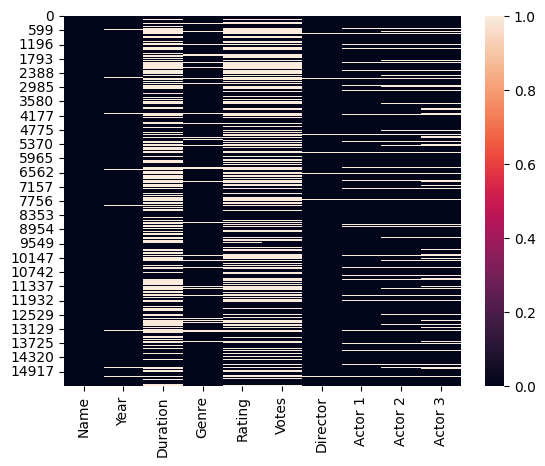

In [ ]:
#Visualization of missing values
sns.heatmap(df.isnull());

In [ ]:
#Dropping null values in the entire row except name column
df = df.dropna(subset=['Year', 'Duration', 'Genre','Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'],how='all')
df.shape

(15459, 10)

In [ ]:
#Dropping the null values for Duration, Rating and Votes columns since it has high percentage of null values
df.dropna(subset=['Duration','Rating', 'Votes'], inplace = True)

In [ ]:
#Filling the null values of Genre, Director and Actor 1 columns with its mode value
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)
df['Director'].fillna(df['Director'].mode()[0], inplace=True)
df['Actor 1'].fillna(df['Actor 1'].mode()[0], inplace=True)

In [ ]:
Directors = df["Director"].value_counts()
Directors.head(5)

Director
David Dhawan            42
Mahesh Bhatt            39
Ram Gopal Varma         34
Shakti Samanta          34
Hrishikesh Mukherjee    33
Name: count, dtype: int64

In [ ]:
Actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).dropna().value_counts()
Actors.head(5)

Amitabh Bachchan      223
Mithun Chakraborty    160
Dharmendra            146
Ashok Kumar           125
Akshay Kumar          120
Name: count, dtype: int64

In [ ]:
#Filling the null values of Actor 2 and Actor 3 columns with a value 'None'.
df['Actor 2'].fillna('None', inplace=True)
df['Actor 3'].fillna('None', inplace=True)

In [ ]:
#Re-checking the null values in the dataframe
missing_values_percent(df)

,Missing Values,Percentage
Name,0,0.0%
Year,0,0.0%
Duration,0,0.0%
Genre,0,0.0%
Rating,0,0.0%
Votes,0,0.0%
Director,0,0.0%
Actor 1,0,0.0%
Actor 2,0,0.0%
Actor 3,0,0.0%


In [ ]:
#Checking if there are any typos or any unnecessary special characters in the dataframe

for col in df.select_dtypes(include = "object"):
    print(f"Name of Column: {col}")
    print(df[col].unique())
    print('\n', '*'*100, '\n')

Name of Column: Name
['#Gadhvi (He thought he was Gandhi)' '#Yaaram' '...Aur Pyaar Ho Gaya' ...
 'Zulm Ki Zanjeer' 'Zulmi' 'Zulm-O-Sitam']

 **************************************************************************************************** 

Name of Column: Year
['(2019)' '(1997)' '(2005)' '(2012)' '(2014)' '(2004)' '(2016)' '(1991)'
 '(2018)' '(2010)' '(1958)' '(2021)' '(2017)' '(2009)' '(1993)' '(2002)'
 '(2008)' '(1994)' '(2007)' '(2003)' '(1998)' '(1979)' '(1974)' '(2015)'
 '(2006)' '(1981)' '(2020)' '(1985)' '(2013)' '(2011)' '(1988)' '(1987)'
 '(1996)' '(1999)' '(1973)' '(1968)' '(1982)' '(1977)' '(1950)' '(1969)'
 '(1948)' '(1990)' '(1989)' '(2001)' '(2000)' '(1953)' '(1978)' '(1963)'
 '(1992)' '(1976)' '(1984)' '(1986)' '(1966)' '(1975)' '(1980)' '(1967)'
 '(1970)' '(1952)' '(1972)' '(1971)' '(1964)' '(1957)' '(1954)' '(1962)'
 '(1965)' '(1995)' '(1956)' '(1955)' '(1936)' '(1983)' '(1951)' '(1961)'
 '(1959)' '(1949)' '(1960)' '(1946)' '(1940)' '(1945)' '(1938)' '(1941)'
 '(19

In [ ]:
#Extracting only the text part from the Name column
df['Name'] = df['Name'].str.extract('([A-Za-z\s\'\-]+) #.')

In [ ]:
# Removing the brackets'()' from Year column and converting 'Year' column to numeric datatype
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True).astype(int)

In [ ]:
# Converting 'Duration' to numeric datatype and removing the min from it and keeping only numerical part
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(r' min', '', regex=True), errors='coerce')

In [ ]:
#Displaying each unique Genre count
genres_count = df['Genre'].value_counts()
genres_count = pd.DataFrame(list(genres_count.items()))
genres_count = genres_count.rename(columns={0: 'Genre', 1: 'Count'})
genres_count.head()

,Genre,Count
0,Drama,899
1,"Drama, Romance",334
2,"Action, Crime, Drama",328
3,"Action, Drama",207
4,"Comedy, Drama",206


In [ ]:
# Splitting the genre into different columns to keep only unique genres
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')

In [ ]:
#Displaying each single Genre count after splitting the multiple genres
genre_counts = {}
for genre in df['Genre'].values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1
GenreCounts = {genre: count for genre, count in sorted(genre_counts.items())}
for genre, count in GenreCounts.items():
    print(f"{genre}: {count}")

Action: 1697
Adventure: 283
Animation: 56
Biography: 124
Comedy: 1351
Crime: 876
Documentary: 129
Drama: 3875
Family: 428
Fantasy: 147
History: 103
Horror: 205
Music: 55
Musical: 416
Mystery: 308
News: 2
Romance: 1382
Sci-Fi: 34
Sport: 44
Thriller: 684
War: 34
Western: 2


In [ ]:
# Converting 'Votes' to numeric and removing comma and unnecessary space to keep only numerical part
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''), errors='coerce')

In [ ]:
#Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12235 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1 non-null      object 
 1   Year      12235 non-null  int64  
 2   Duration  12235 non-null  int64  
 3   Genre     12235 non-null  object 
 4   Rating    12235 non-null  float64
 5   Votes     12235 non-null  int64  
 6   Director  12235 non-null  object 
 7   Actor 1   12235 non-null  object 
 8   Actor 2   12235 non-null  object 
 9   Actor 3   12235 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.0+ MB


In [ ]:
#Displaying the Numerical columns and Object columns in the dataframe
num_list = df.select_dtypes(include='number').columns.tolist()
obj_list = df.select_dtypes(include='object').columns.tolist()
print(f'\nNumerical columns in the dataframe: {num_list}')
print(f'\nObject columns in the dataframe: {obj_list}')


Numerical columns in the dataframe: ['Year', 'Duration', 'Rating', 'Votes']

Object columns in the dataframe: ['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']


In [ ]:
# Displaying the number of unique values for each numerical columns
for i in num_list:
    print("No. of unique values in %s column are: %s" % (i, df[i].nunique()))

No. of unique values in Year column are: 91
No. of unique values in Duration column are: 178
No. of unique values in Rating column are: 83
No. of unique values in Votes column are: 2028


In [ ]:
# Displaying the number of unique values for each categorical columns
for i in obj_list:
    print("No. of unique values in %s column are: %s" % (i, df[i].nunique()))

No. of unique values in Name column are: 1
No. of unique values in Genre column are: 22
No. of unique values in Director column are: 2547
No. of unique values in Actor 1 column are: 2044
No. of unique values in Actor 2 column are: 2369
No. of unique values in Actor 3 column are: 2567


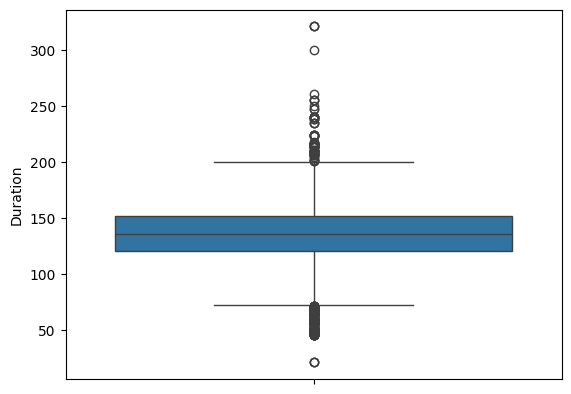

In [ ]:
# Visualizing outliers using boxplot for 'Duration' column
sns.boxplot(y='Duration',data=df)
plt.show()

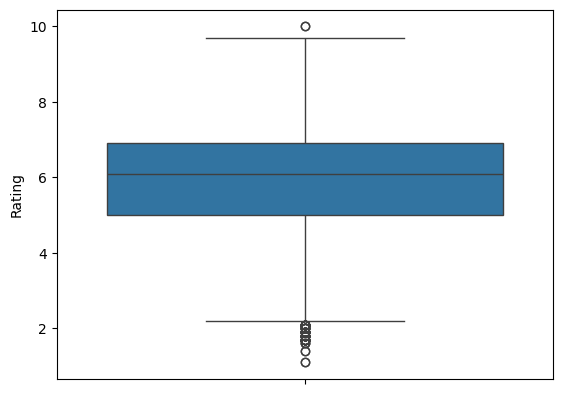

In [ ]:
# Visualizing outliers using boxplot for 'Rating' column
sns.boxplot(y='Rating',data=df)
plt.show()

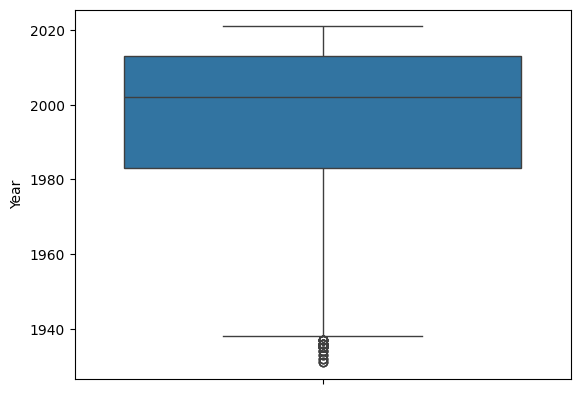

In [ ]:
# Visualizing outliers using boxplot for 'Year' column
sns.boxplot(y='Year',data=df)
plt.show()

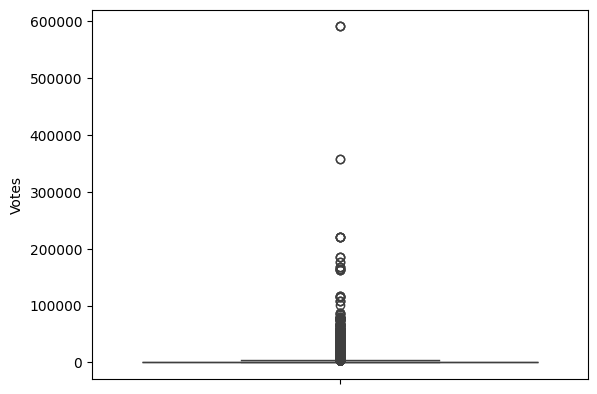

In [ ]:
# Visualizing outliers using boxplot for 'Votes' column
sns.boxplot(y='Votes',data=df)
plt.show()

In [ ]:
#Function to remove outliers by capping the values between upper bound and lower bound by IQR method
def outlier(data):
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)

    IQR=Q3-Q1

    upper_bound=Q3+1.5*IQR
    lower_bound=Q1-1.5*IQR

    return data.clip(upper_bound,lower_bound)

In [ ]:
#Outlier Removal
df['Duration']=outlier(df['Duration'])
df['Rating']=outlier(df['Rating'])
df['Year']=outlier(df['Year'])
df['Votes']=outlier(df['Votes'])

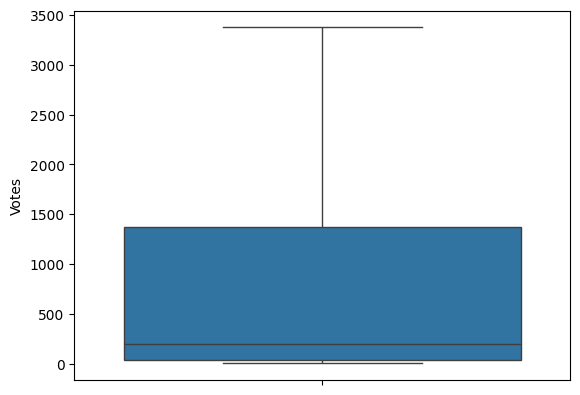

In [ ]:
#Confirming Outlier Removal for 'Votes' column
sns.boxplot(y='Votes',data=df)
plt.show()

In [ ]:
df.shape

(12235, 10)

Now, after data preprocessing, we have 12,235 rows and 10 columns. Hence we can proceed to perform analysis for this dataset.

**Exploratory data analysis(EDA)** **bold text**
1. Movie with the highest votes and lowest votes. Highest and lowest number of votes for that movie.

In [ ]:
# Find the row with the highest number of votes
max_votes = df[df['Votes'] == df['Votes'].max()]

# Get the name of the movie with the highest votes
highest_votes = max_votes['Name'].values[0]
print("Movie with the highest votes:", highest_votes)

# Find the number of votes for the movie with the highest votes
votes_highest_count = max_votes['Votes'].values[0]
print("Highest number of votes for this movie:", votes_highest_count)
print('*'*100)


# Find the row with the lowest number of votes
min_votes = df[df['Votes'] == df['Votes'].min()]

# Get the name of the movie with the lowest votes
lowest_votes = min_votes['Name'].values[0]
print("Movie with the lowest votes:", lowest_votes)

# Find the number of votes for the movie with the lowest votes
votes_lowest_count = min_votes['Votes'].values[0]
print("Lowest number of votes for this movie:", votes_lowest_count)

Movie with the highest votes: nan
Highest number of votes for this movie: 3375.25
****************************************************************************************************
Movie with the lowest votes: nan
Lowest number of votes for this movie: 5.0


**2. Movie with the highest Rating and lowest Rating.**

Number of votes for the movie with highest Rating and lowest Rating.

In [ ]:
# Find the row with the highest rating
max_rating = df[df['Rating'] == df['Rating'].max()]

# Get the name of the movie with the highest rating
movie_highest_rating = max_rating['Name'].values[0]
print("Movie with the highest rating:", movie_highest_rating)

# Get the highest rating of the movie
highest_rating = max_rating['Rating'].values[0]
print("Highest rating of the movie:", highest_rating)

#Find the number of votes for the movie with the highest rating
votes_highest_rating = max_rating['Votes'].values[0]
print("Number of votes for the movie with the highest rating:", votes_highest_rating)
print('*'*100)

# Find the row with the lowest rating
min_rating = df[df['Rating'] == df['Rating'].min()]

# Get the name of the movie with the lowest rating
movie_lowest_rating = min_rating['Name'].values[0]
print("Movie with the lowest rating:", movie_lowest_rating)

# Get the lowest rating of the movie
lowest_rating = min_rating['Rating'].values[0]
print("Lowest rating of the movie:", lowest_rating)

#Find the number of votes for the movie with the lowest rating
votes_lowest_rating = min_rating['Votes'].values[0]
print("Number of votes for the movie with the lowest rating:", votes_lowest_rating)

**3. Director with the highest and lowest number of movies directed.**

Number of movies directed by of those directors.

In [ ]:
# Find the director with the highest number of movies directed
most_prolific_director = Directors.idxmax()
print("Director with the most movies directed:", most_prolific_director)

#Number of movies directed by that director
num_movies_directed = Directors.max()
print("Number of movies directed by", most_prolific_director, ":", num_movies_directed)
print('*'*100)

# Find the director with the lowest number of movies directed
least_prolific_director = Directors.idxmin()
print("Director with the least movies directed:", least_prolific_director)

#Number of movies directed by that director
num_movies_directed = Directors.min()
print("Number of movies directed by", most_prolific_director, ":", num_movies_directed)

**4. Top 10 Actors with total number of movies he/she acted**

In [ ]:
#Find the Top 10 Actors
Top_actors = Actors.nlargest(n=10)

#Creating a dataframe to store top 10 Actors with total number of movies
Top_actors = pd.DataFrame(list(Top_actors.items()))
Top_actors = Top_actors.rename(columns={0: 'Actor', 1: 'Total no. of Movies'})
Top_actors

,Actor,Total no. of Movies
0,Amitabh Bachchan,223
1,Mithun Chakraborty,160
2,Dharmendra,146
3,Ashok Kumar,125
4,Akshay Kumar,120
5,Shashi Kapoor,117
6,Jeetendra,116
7,Sanjay Dutt,101
8,Rekha,92
9,Ajay Devgn,92


**5. Top 5 most popular IMDb Indian Movie Genres**


In [ ]:
#Creating a dataframe to store movie genres
Top_Genres = pd.DataFrame(list(genre_counts.items()))
Top_Genres = Top_Genres.rename(columns={0: 'Genre', 1: 'Count'})
Top_Genres = Top_Genres.sort_values(by=['Count'], ascending=False).reset_index(drop=True)

#top 5 most popular movie genres
Top_5_Genres = Top_Genres.head(5)
Top_5_Genres

,Genre,Count
0,Drama,3875
1,Action,1697
2,Romance,1382
3,Comedy,1351
4,Crime,876


**Data Visualization**

**1. Annual Movie Release Over Time**

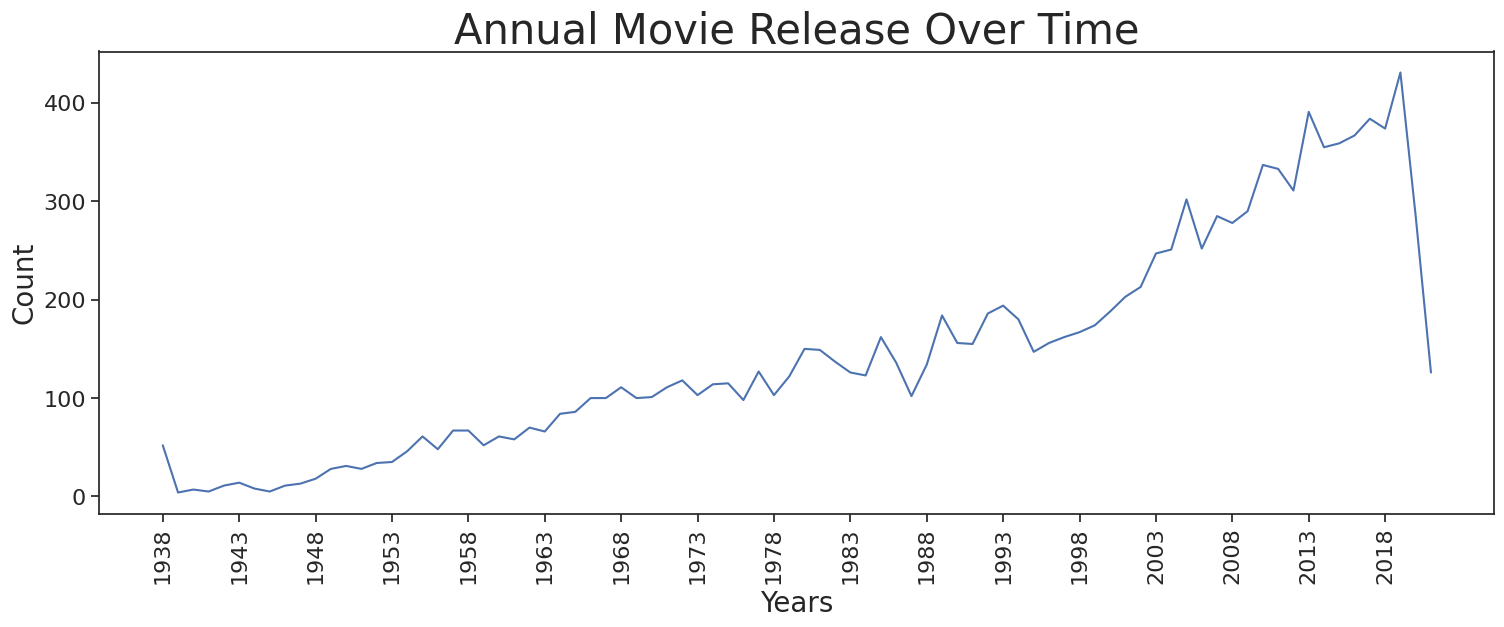

In [ ]:
#style seaborn plots to "ticks" for the on the axes
sns.set(style = "ticks", font = "Calibri")
plt.figure(figsize=(18,6))

#create a line plot of annual movie release counts based on the 'Year' column and sorting by 'Year' column
ax = sns.lineplot(data=df['Year'].value_counts().sort_index())
tick_positions = range(min(df['Year']), max(df['Year']) + 1, 5)
y = [s*s for s in tick_positions]

#Set the font properties for the titles and labels of the plot
ax.set_title("Annual Movie Release Over Time", fontsize=30)
ax.set_xticks(tick_positions)
plt.yticks(fontsize=16)
ax.set_xticklabels(tick_positions, rotation = 90, fontsize=16)
ax.set_xlabel("Years", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.show()

**2. Average Movie Duration Trends Over the Years**


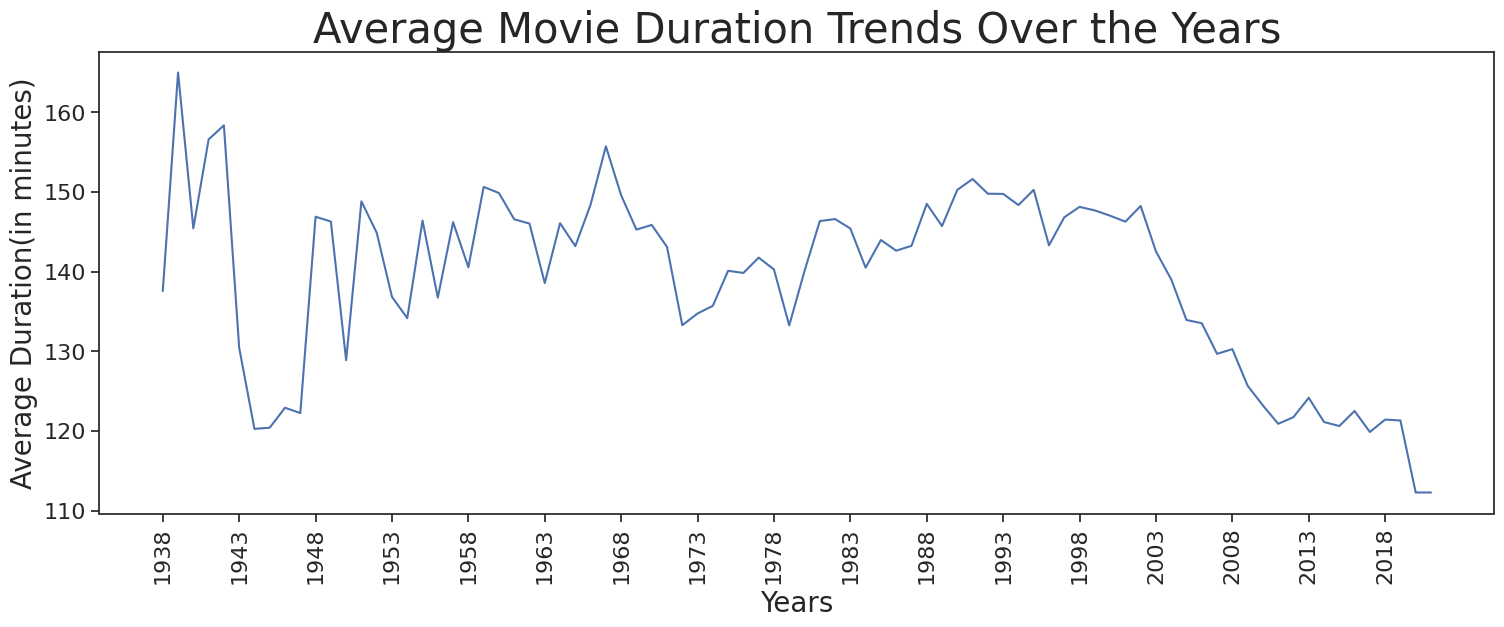

In [ ]:
plt.figure(figsize=(18,6))

#create a line plot by grouping Year and Duration column and finding the Average of Duration column
ax = sns.lineplot(data=df.groupby('Year')['Duration'].mean().reset_index(), x='Year', y='Duration')
tick_positions = range(min(df['Year']), max(df['Year']) + 1, 5)
y = [s*s for s in tick_positions]

#Set the font properties for the titles and labels of the plot
ax.set_title("Average Movie Duration Trends Over the Years", fontsize=30)
ax.set_xticks(tick_positions)
plt.yticks(fontsize=16)
ax.set_xticklabels(tick_positions, rotation = 90, fontsize=16)
ax.set_xlabel("Years", fontsize=20)
ax.set_ylabel("Average Duration(in minutes)", fontsize=20)
plt.show()

**3. Average Movie Votes Trends Over the Years**

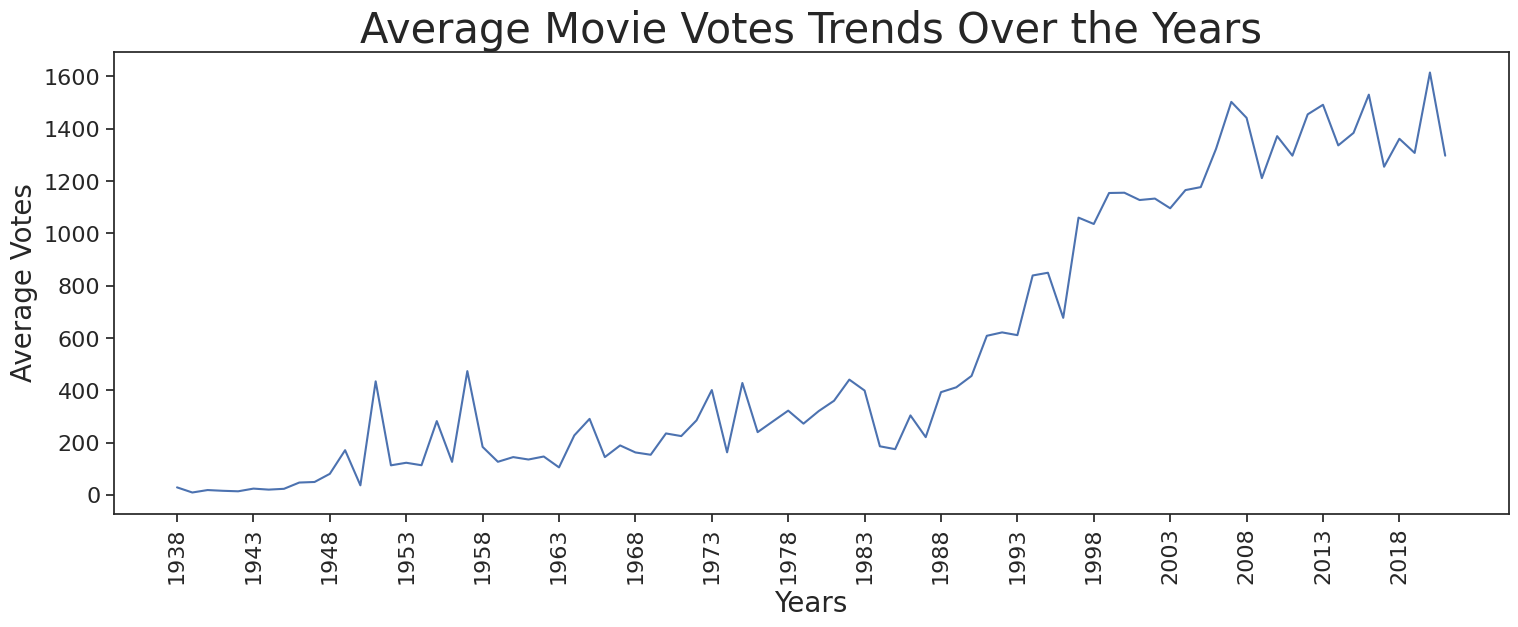

In [ ]:
plt.figure(figsize=(18,6))

#create a line plot by grouping Year and Votes column and finding the Average of Votes column
ax = sns.lineplot(data=df.groupby('Year')['Votes'].mean().reset_index(), x='Year', y='Votes')
tick_positions = range(min(df['Year']), max(df['Year']) + 1, 5)
y = [s*s for s in tick_positions]

#Set the font properties for the titles and labels of the plot
ax.set_title("Average Movie Votes Trends Over the Years", fontsize=30)
ax.set_xticks(tick_positions)
plt.yticks(fontsize=16)
ax.set_xticklabels(tick_positions, rotation = 90, fontsize=16)
ax.set_xlabel("Years", fontsize=20)
ax.set_ylabel("Average Votes", fontsize=20)
plt.show()

**4. Top 10 Years by Average Rating**

In [ ]:
year_avg_rating = df.groupby('Year')['Rating'].mean().reset_index()

top_5_years = year_avg_rating.nlargest(10, 'Rating')
fig = px.bar(top_5_years, x='Year', y='Rating', title='<b>Top 10 Years by Average Rating</b>', color = "Rating",
             color_continuous_scale = "darkmint")
fig.update_xaxes(type='category',tickfont_size=14, color ='black')
fig.update_yaxes(tickfont_size=14, color ='black')
fig.update_layout(xaxis_title='<b>Year</b>', yaxis_title='<b>Average Rating</b>', plot_bgcolor = 'white', title_font=dict(size=20),
                  xaxis=dict(title_font=dict(size=16)), yaxis=dict(title_font=dict(size=16),color='black'),
                title={'y':0.9, 'x':0.5, 'xanchor': 'center','yanchor': 'top'},title_font_color="black")
fig.show()

**5. Distribution of Duration**

In [ ]:
duration = px.histogram(df, x = 'Duration', histnorm='probability density', nbins = 40,
                        color_discrete_sequence = px.colors.qualitative.Vivid)
duration.update_traces(selector=dict(type='histogram'))
duration.update_layout(title='<b>Distribution of Duration</b>', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=24),
                       xaxis_title='<b>Duration</b>', yaxis_title='<b>Probability Density</b>', xaxis=dict(showgrid=False,
                       title_font=dict(size=18),color='black'), yaxis=dict(showgrid=False,title_font=dict(size=18),color='black'),
                       bargap=0.02, plot_bgcolor = 'white',title_font_color="black")
duration.update_xaxes(tickfont_size=14, color ='black')
duration.update_yaxes(tickfont_size=14)
duration.show()

**6. Genre Word cloud Visualization**

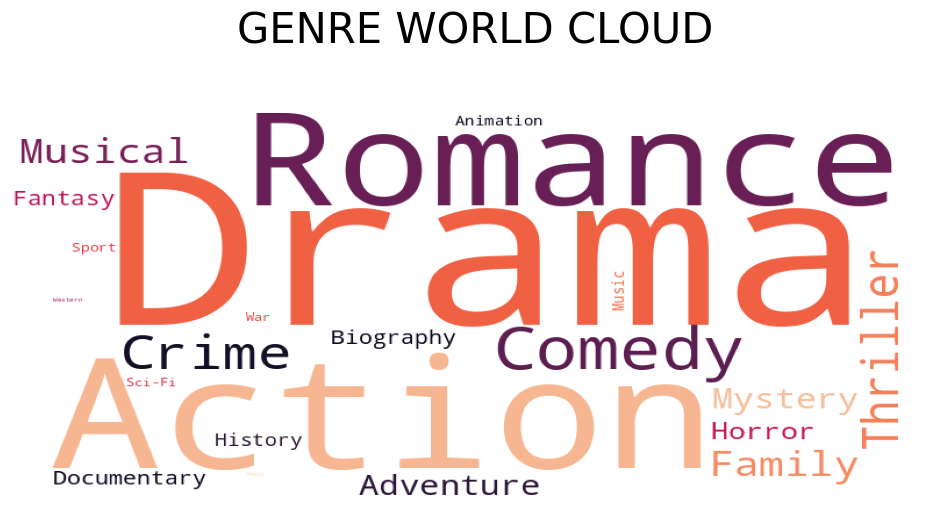

In [ ]:
#Instantiate wordcloud object and use method to feed it to Genres
wordcloud = WordCloud(width=800, height=400, colormap='rocket', background_color='white').generate_from_frequencies(genre_counts)

#Plot to generate the word cloud from text
plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, aspect='auto', extent=(20, 80, 20, 80))
plt.axis('off')
plt.title('GENRE WORLD CLOUD',pad=50, fontsize=30,color='black')
plt.show()

**7. Most Popular Genres of IMDb Indian Movies**

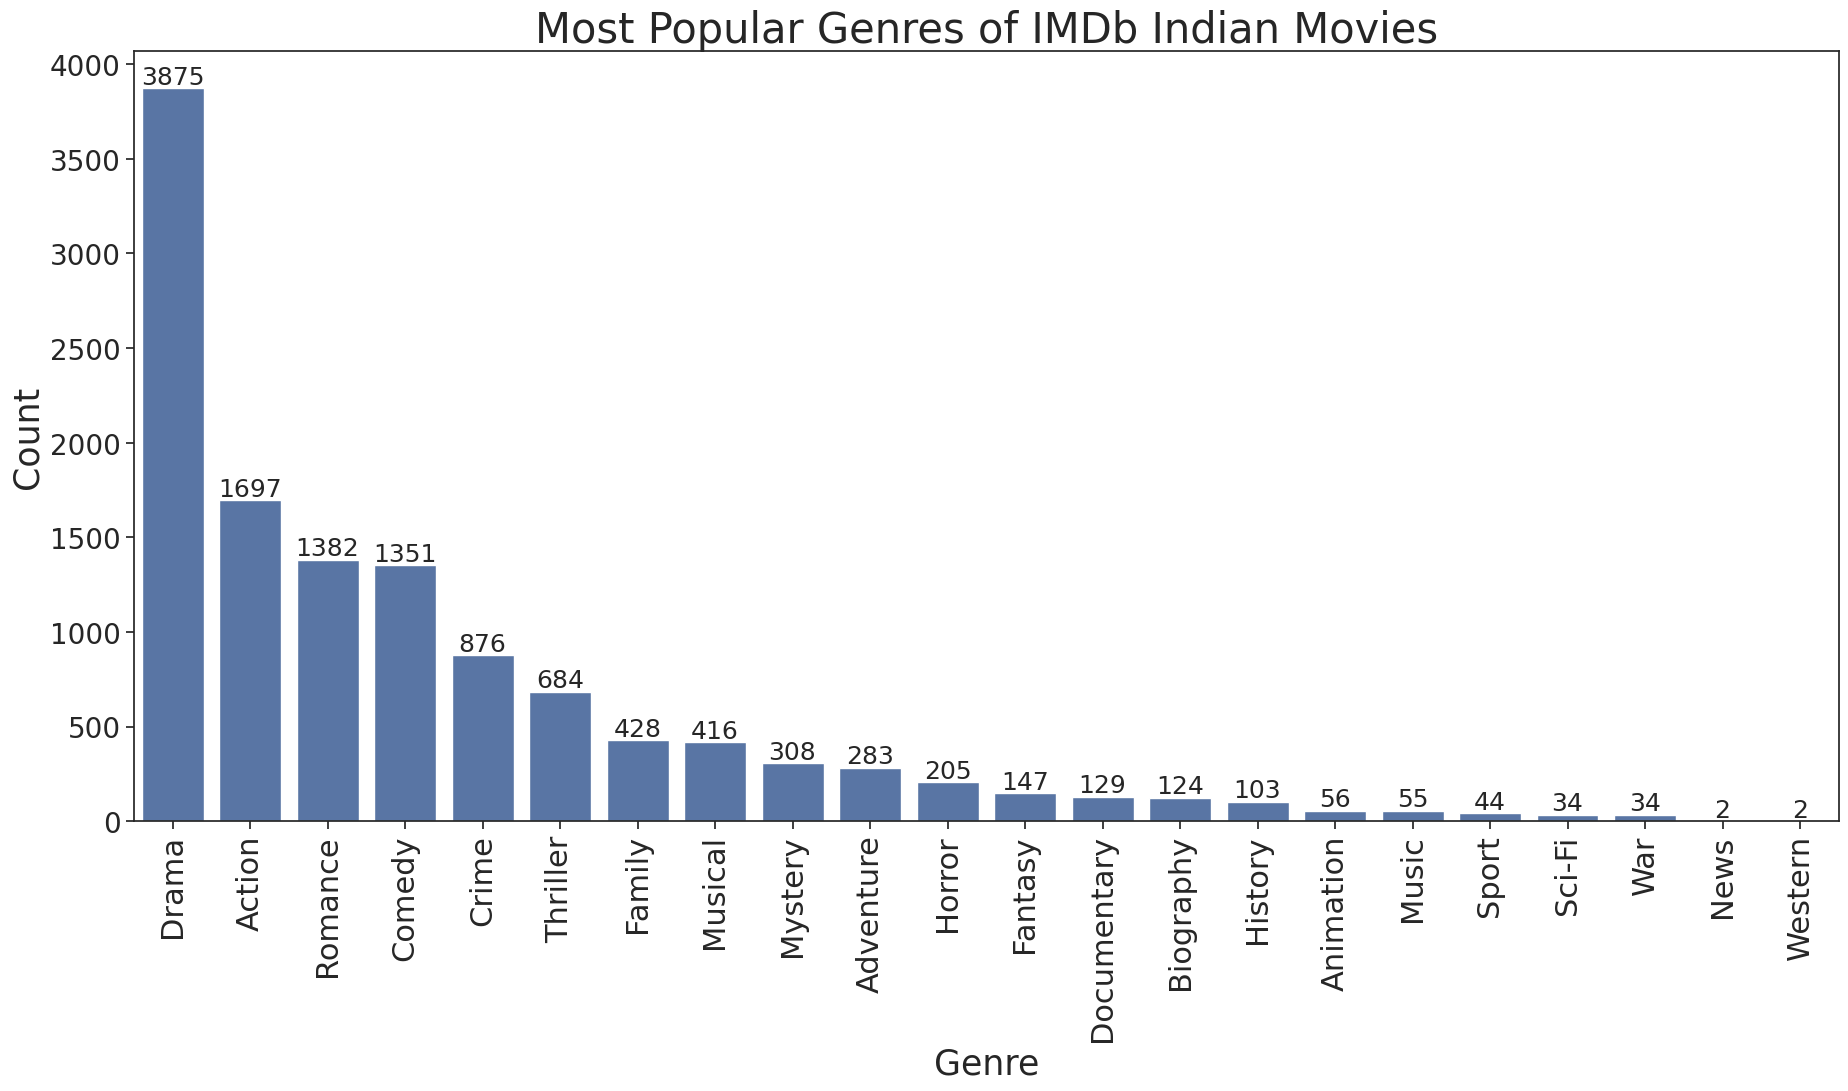

In [ ]:
# Defining the plot size
plt.figure(figsize=(22, 10))

# Defining the values for x-axis, y-axis and from which dataframe the values are to be picked
plots = sns.barplot(x="Genre", y="Count", data=Top_Genres)

# Iterating over the bars one-by-one to annotate the bars
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center',
                   va='center', size=18, xytext=(0, 8), textcoords='offset points')

# Setting the title for the graph
plt.title("Most Popular Genres of IMDb Indian Movies", size=30)
# Setting the label for x-axis and y-axis
plt.xlabel("Genre", size=25)
plt.ylabel("Count", size=25)
plt.xticks(rotation=90,fontsize=22)
plt.yticks(fontsize=20)
plt.show()

**Insights:** From the above plot, we can clearly see that the most popular Genres are Drama, Action, Romance, Comedy and Crime. And the least popular genre is Western. Moreover, in terms of Genre, the Drama is the most popular genre since it's start

**8. Most Popular multiple Genres of IMDb Indian Movies**


In [ ]:
genres_count = genres_count.sort_values(by=['Count'], ascending = False).head(10)
ax = px.pie(genres_count, values='Count', names='Genre', title='<b>Most Popular multiple Genres of IMDb Indian Movies</b>',
            color_discrete_sequence=px.colors.sequential.RdBu, labels={'Genre':'Count'})
ax.update_traces(textposition='inside', textinfo='percent+label')
ax.update_layout( title={'y':0.9, 'x':0.4, 'xanchor': 'center','yanchor': 'top'},title_font_color="black",
                legend=dict(title='<b>Genres</b>', title_font_family="Calibri",
                font=dict(family="Courier", size=14, color="black"), bgcolor="LightSteelBlue", bordercolor="Black",
                borderwidth=2))
ax.show()

**9. Distribution of Movie Ratings**

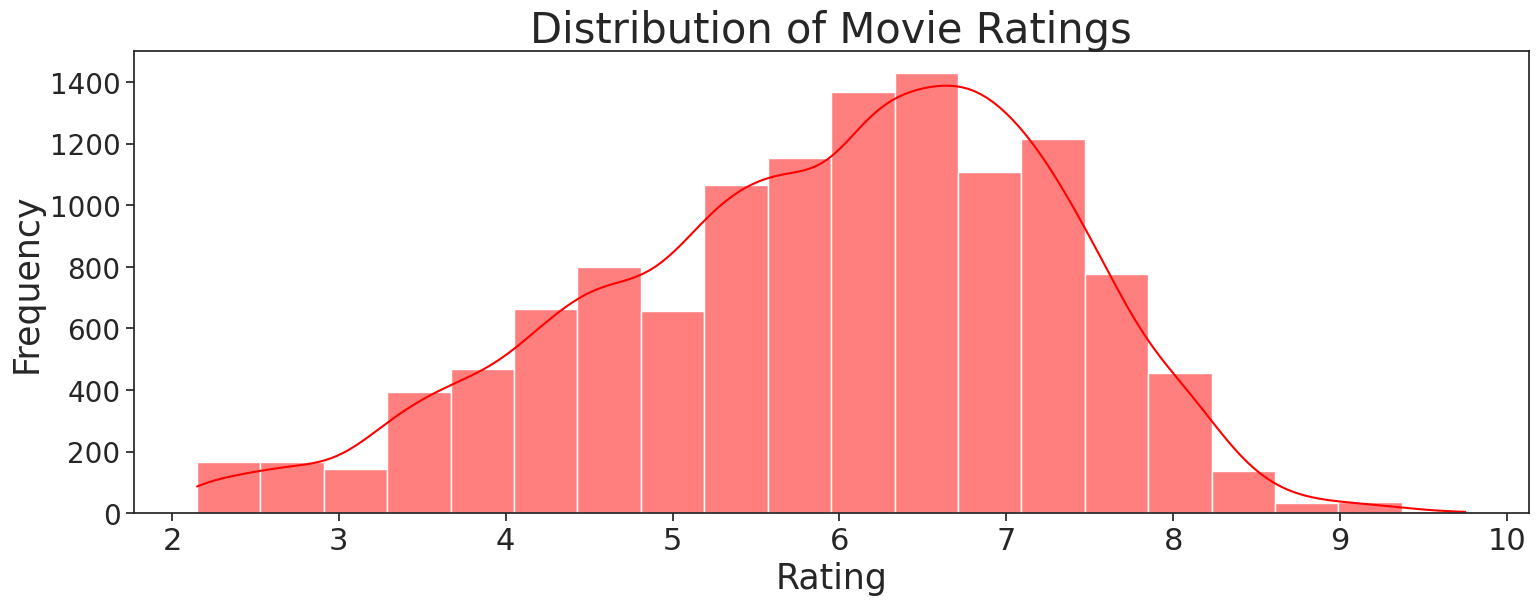

In [ ]:
plt.figure(figsize=(18, 6))
ax = sns.histplot(data = df, x = "Rating", bins = 20, kde = True, color='red')
ax.set_xlabel('Rating',size=25)
ax.set_ylabel('Frequency',size=25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=20)
ax.set_title('Distribution of Movie Ratings',size=30)
plt.show()

**10. Total Votes per Rating**

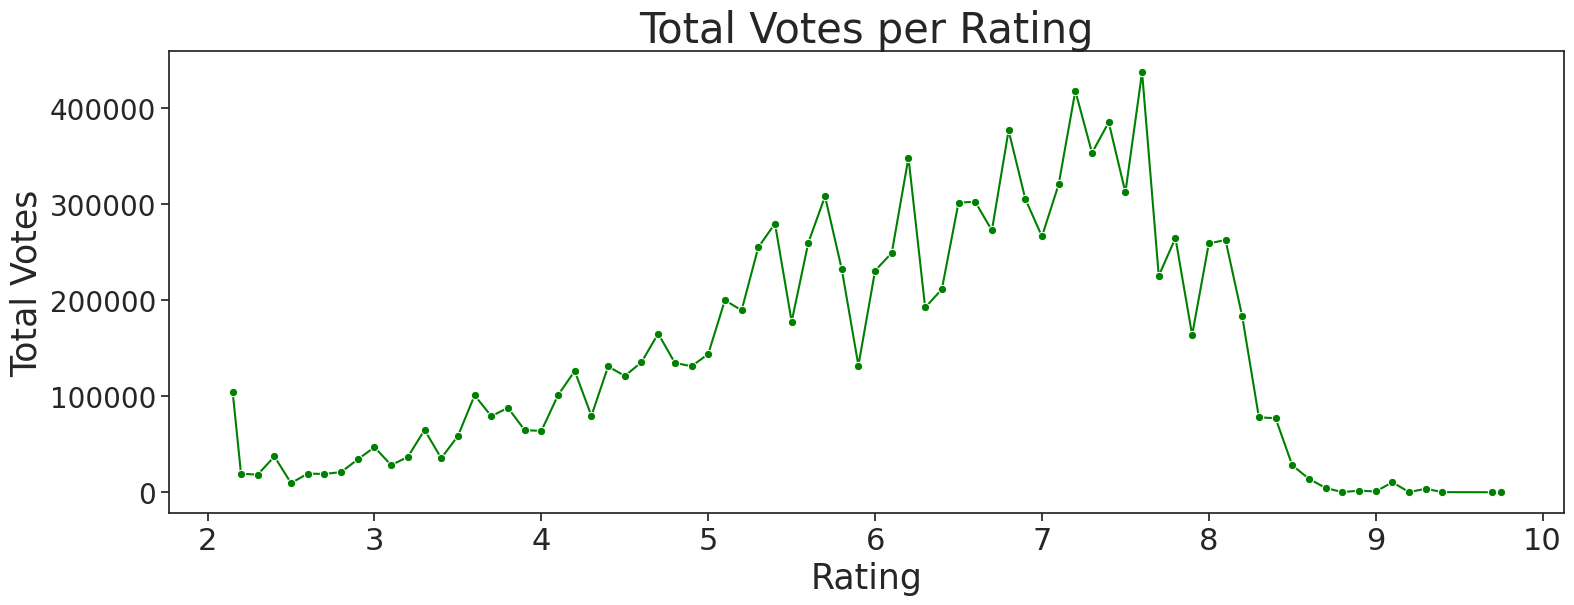

In [ ]:
plt.figure(figsize=(18, 6))
rating_votes = df.groupby('Rating')['Votes'].sum().reset_index()
ax = sns.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o',color='green')
ax.set_xlabel('Rating',size=25)
ax.set_ylabel('Total Votes',size=25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=20)
ax.set_title('Total Votes per Rating',size=30)

plt.show()

**11. Top 20 Directors by Total No. of Movies**


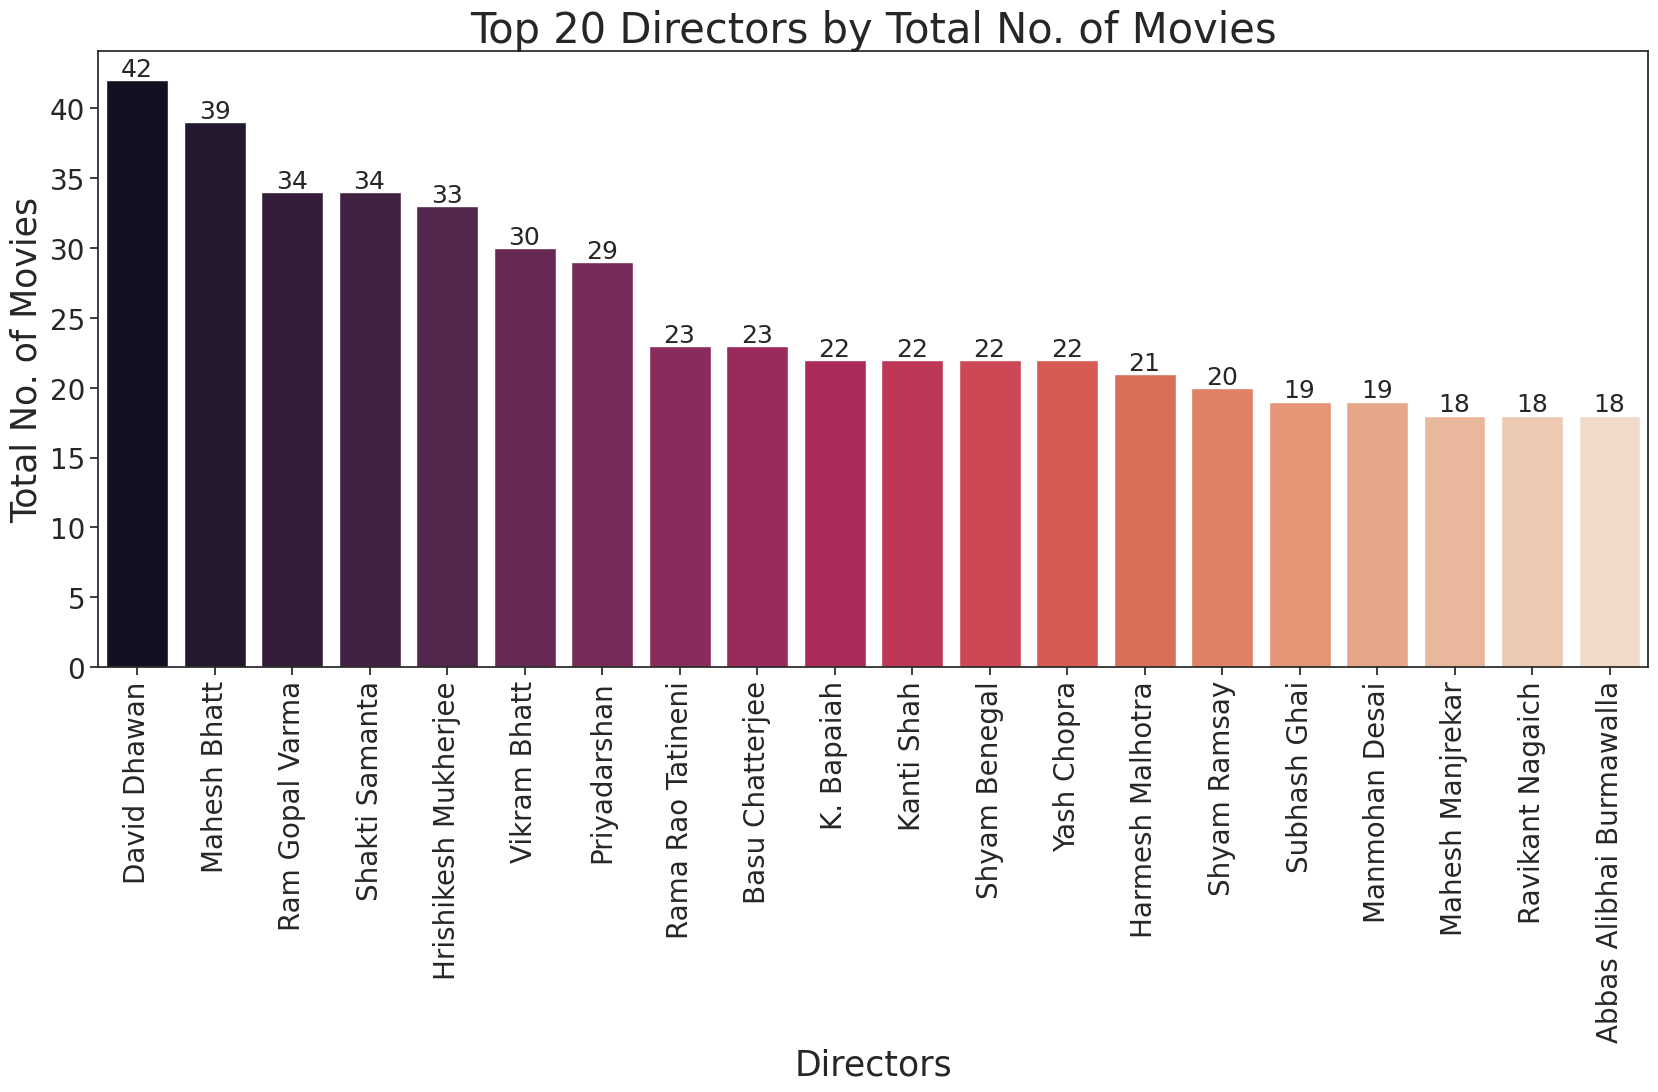

In [ ]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x=Directors.head(20).index, y=Directors.head(20).values, palette='rocket')
# Iterating over the bars one-by-one to annotate the bars
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center',
                   va='center', size=18, xytext=(0, 8), textcoords='offset points')
ax.set_xlabel('Directors',size=25)
ax.set_ylabel('Total No. of Movies',size=25)
plt.yticks(fontsize=20)
ax.set_title('Top 20 Directors by Total No. of Movies',size=30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,size=20)
plt.show()

**12. Top 20 Actors by Total No. of Movies**

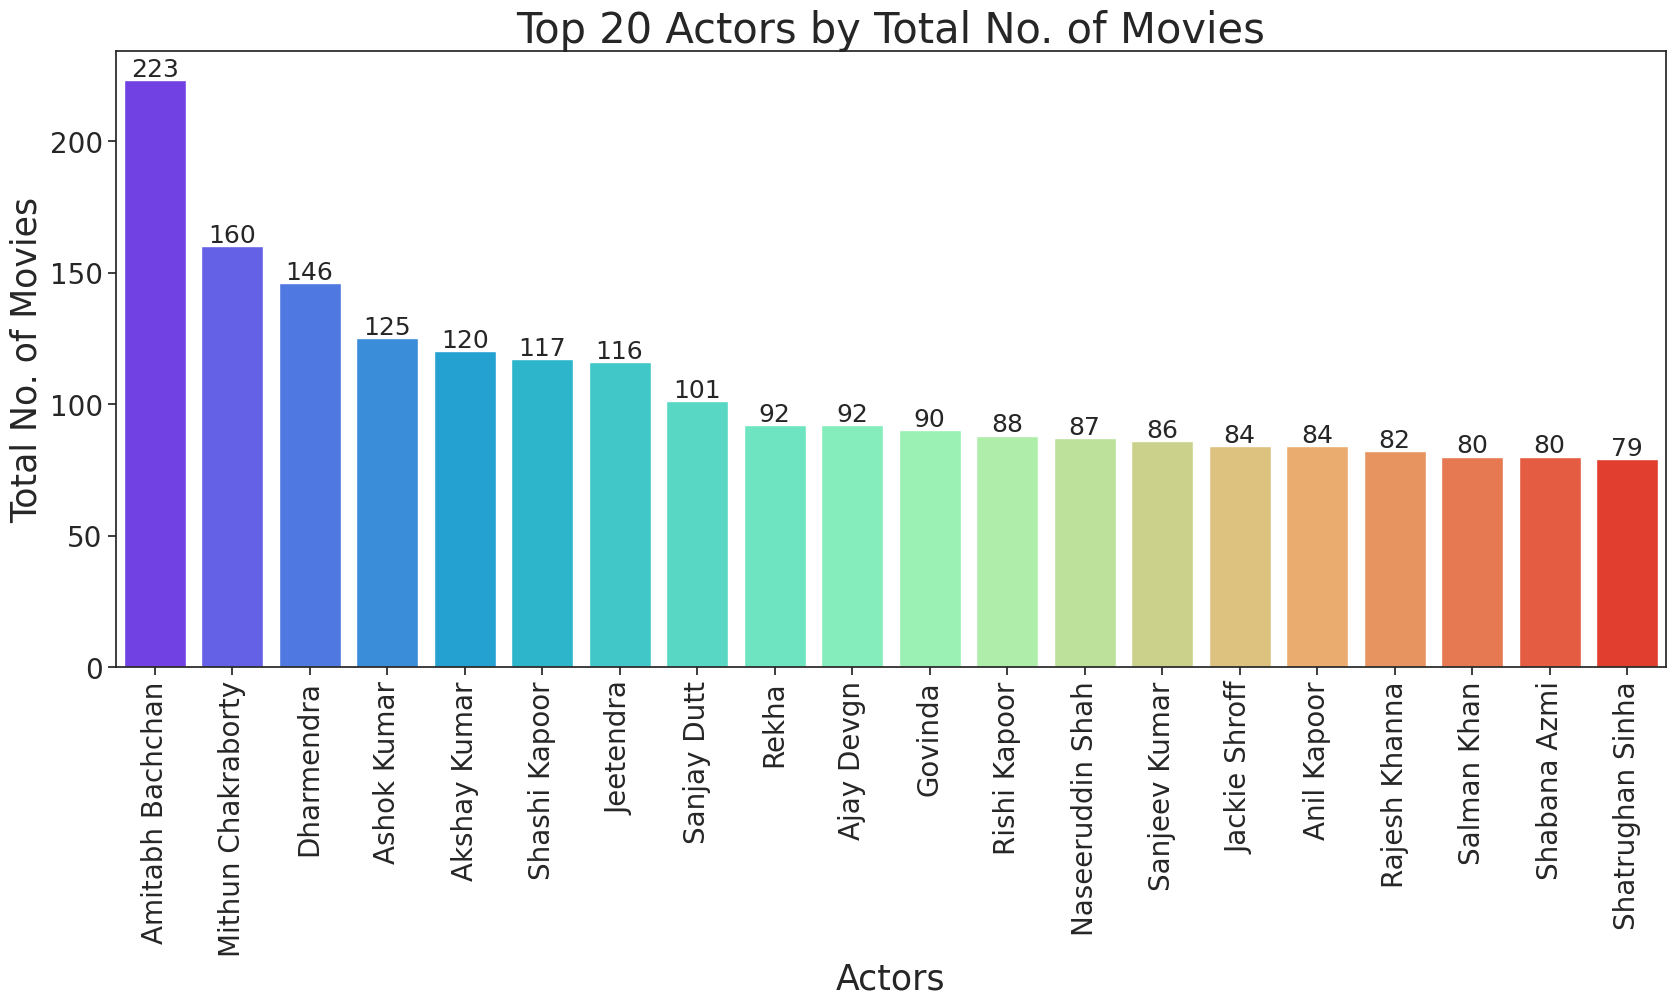

In [ ]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x=Actors.head(20).index, y=Actors.head(20).values, palette='rainbow')
# Iterating over the bars one-by-one to annotate the bars
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center',
                   va='center', size=18, xytext=(0, 8), textcoords='offset points')
ax.set_xlabel('Actors',size=25)
ax.set_ylabel('Total No. of Movies',size=25)
plt.yticks(fontsize=20)
ax.set_title('Top 20 Actors by Total No. of Movies',size=30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,size=20)
plt.show()

**Feature Engineering:**

In [ ]:
# Dropping columns which are not required
df.drop('Name', axis = 1, inplace = True)

In [ ]:
# Grouping the columns with their average rating and then creating a new feature for movie rating prediction

genre_avg_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_avg_rating'] = genre_avg_rating

director_avg_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_avg_rating'] = director_avg_rating

actor1_avg_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_avg_rating'] = actor1_avg_rating

actor2_avg_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_avg_rating'] = actor2_avg_rating

actor3_avg_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_avg_rating'] = actor3_avg_rating

**Splitting the data into training and testing sets**

In [ ]:
# Selecting the predictor variable(X) and target variable(y)

X = df[[ 'Year', 'Votes', 'Duration', 'Genre_avg_rating','Director_avg_rating','Actor1_avg_rating', 'Actor2_avg_rating',
        'Actor3_avg_rating']]
y = df['Rating']

In [ ]:
# Splitting the dataset into training and testing parts
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Selecting ML Models and Model Training**

In [ ]:
# Building machine learning models and training them

#Fit model with Linear Regression and make predictions on the test data
linear = LinearRegression()
linear.fit(X_train,y_train)
linear_model = linear.predict(X_test)

#Fit model with Decision Tree Regressor and make predictions on the test data
RF = RandomForestRegressor(n_estimators=100, random_state=42)
RF.fit(X_train,y_train)
RF_model = RF.predict(X_test)

#Fit model with Linear Regression and make predictions on the test data
DTree = DecisionTreeRegressor(random_state=42)
DTree.fit(X_train, y_train)
DTree_model = DTree.predict(X_test)

#Fit model with XGBoost Regressor and make predictions on the test data
XGBR = XGBRegressor(n_estimators=100, random_state=42)
XGBR.fit(X_train, y_train)
XGBR_model = XGBR.predict(X_test)

#Fit model with Gradient Boosting Regressor and make predictions on the test data
GBR = GradientBoostingRegressor(n_estimators=100, random_state=42)
GBR.fit(X_train, y_train)
GBR_model = GBR.predict(X_test)

#Fit model with Support Vector Regressor and make predictions on the test data
SVRM = SVR(kernel='rbf')
SVRM.fit(X_train, y_train)
SVR_model = SVRM.predict(X_test)

#Fit model with K Nearest Neighbors Regressor and make predictions on the test data
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train, y_train)
KNN_model = KNN.predict(X_test)

**Model Evaluation**

In [ ]:
# Creating a function to evaluate performance metrics for all the trained models

def evaluate_model(y_true, y_pred, model_name):
    print(f'The performance evaluation of {model_name} is below: ', '\n')
    print("Accuracy: {:0.2f}%".format(r2_score(y_true, y_pred)*100))
    print("Mean Squared Error: {:0.2f}".format(mean_squared_error(y_true, y_pred)))
    print("Mean absolute error: {:0.2f}".format(mean_absolute_error(y_true, y_pred)))
    print('*'*100, '\n')
    return round(r2_score(y_true, y_pred)*100, 2)

In [ ]:
#Evaluating all the trained models by passing repective testing dataset into the function created
LRScore = evaluate_model(y_test, linear_model, "Linear Regression")
RFScore = evaluate_model(y_test, RF_model, "Random Forest")
DTreeScore = evaluate_model(y_test, DTree_model, "Decision Tree Regression")
XGBScore = evaluate_model(y_test, XGBR_model, "Extended Gradient Boosting")
GBScore = evaluate_model(y_test, GBR_model, "Gradient Boosting")
SVRScore = evaluate_model(y_test, SVR_model, "Support Vector Regression")
KNNScore = evaluate_model(y_test, KNN_model, "K Nearest Neighbors")

The performance evaluation of Linear Regression is below:  

Accuracy: 78.47%
Mean Squared Error: 0.40
Mean absolute error: 0.47
**************************************************************************************************** 

The performance evaluation of Random Forest is below:  

Accuracy: 93.50%
Mean Squared Error: 0.12
Mean absolute error: 0.19
**************************************************************************************************** 

The performance evaluation of Decision Tree Regression is below:  

Accuracy: 90.77%
Mean Squared Error: 0.17
Mean absolute error: 0.13
**************************************************************************************************** 

The performance evaluation of Extended Gradient Boosting is below:  

Accuracy: 91.41%
Mean Squared Error: 0.16
Mean absolute error: 0.26
**************************************************************************************************** 

The performance evaluation of Gradient Boosting is below:  


In [ ]:
#Storing all the trained models MSE into variables
Linear_MSE = round(mean_squared_error(y_test,linear_model),2)
RF_MSE = round(mean_squared_error(y_test,RF_model),2)
DTree_MSE = round(mean_squared_error(y_test,DTree_model),2)
XGB_MSE = round(mean_squared_error(y_test,XGBR_model),2)
GB_MSE = round(mean_squared_error(y_test,GBR_model),2)
SVR_MSE = round(mean_squared_error(y_test,SVR_model),2)
KNN_MSE = round(mean_squared_error(y_test,KNN_model),2)

In [ ]:
#Generating pandas dataframe to store all the trained models with respective accuracy score and MSE
models = pd.DataFrame(
    {
        "Regression Models": ["Linear Regression", "Random Forest", "Decision Tree Regression", "Extended Gradient Boosting",
                   "Gradient Boosting", "Support Vector Regression", "K Nearest Neighbors"],
        "Accuracy Scores": [LRScore, RFScore, DTreeScore, XGBScore, GBScore, SVRScore, KNNScore],
        "MSE": [Linear_MSE,RF_MSE,DTree_MSE,XGB_MSE,GB_MSE,SVR_MSE,KNN_MSE]
    }
)
models.sort_values(by='Accuracy Scores', ascending=False).reset_index(drop=True)

,Regression Models,Accuracy Scores,MSE
0,Random Forest,93.50,0.12
1,Extended Gradient Boosting,91.41,0.16
2,Decision Tree Regression,90.77,0.17
3,Gradient Boosting,82.56,0.33
4,Linear Regression,78.47,0.40
5,K Nearest Neighbors,51.61,0.91
6,Support Vector Regression,8.33,1.71


**Operationalizing ML: The Inference Pipeline**

In [ ]:
# Checking a sample of predictor value from the the model which is trained
X.head()

,Year,Votes,Duration,Genre_avg_rating,Director_avg_rating,Actor1_avg_rating,Actor2_avg_rating,Actor3_avg_rating
1,2019,8.0,109,6.070645,7.000000,6.850000,7.00,7.00
3,2019,35.0,110,5.759252,4.400000,5.250000,4.40,4.46
3,2019,35.0,110,5.815774,4.400000,5.250000,4.40,4.46
5,1997,827.0,147,5.759252,5.335135,4.793617,5.73,5.93
5,1997,827.0,147,6.070645,5.335135,4.793617,5.73,5.93


In [ ]:
# Checking the rating according to above predictor variables
y.head()

1    7.0
3    4.4
3    4.4
5    4.7
5    4.7
Name: Rating, dtype: float64

In [ ]:
# Inference from above sample data
Year = int(input('Enter the Year: '))
Votes = int(input('Enter the number of Votes: '))
Duration = int(input('Enter the Duration in minutes: '))
Genre_avg_rating = float(input('Enter the Average Rating of Genre: '))
Director_avg_rating = float(input('Enter the Average Rating of Director: '))
Actor1_avg_rating = float(input('Enter the Average Rating of Actor1: '))
Actor2_avg_rating = float(input('Enter the Average Rating of Actor2: '))
Actor3_avg_rating = float(input('Enter the Average Rating of Actor3: '))

# Generate unseen data accordingly with inputs
input_list = [Year, Votes, Duration, Genre_avg_rating, Director_avg_rating, Actor1_avg_rating, Actor2_avg_rating,
              Actor3_avg_rating]

Enter the Year: 2019
Enter the number of Votes: 35
Enter the Duration in minutes: 110
Enter the Average Rating of Genre: 5.759
Enter the Average Rating of Director: 4.400
Enter the Average Rating of Actor1: 5.250
Enter the Average Rating of Actor2: 4.40
Enter the Average Rating of Actor3: 4.46


In [ ]:
# Predict the movie rating using Random Forest
predicted_rating = RF.predict([input_list])

# Display the predicted rating
print("Predicted Rating:", round(predicted_rating[0],1))

Predicted Rating: 4.4


We took the sample data from X.head() and asked the user for input and then generated unseen data accordingly with inputs. The original rating was 4.4 and our trained model with random forest regressor predicted 4.4 on unseen data. Therefore, showing the robustness of model.

**Conclusion:**

In analyzing the IMDb Movies India Dataset, I navigated through data visualization, data preprocessing, and machine learning model selection. And then we embarked on a journey to analyze and predict movie ratings.
We encountered a variety of data challenges, such as handling missing values, handling duplicated records, cleaning typos or unnecessary special characters in various columns, detecting outliers and removing the outliers by IQR Method.
Through a series of Data preprocessing steps, we were able to prepare the dataset for Exploratory data analysis(EDA).
The analysis uncovered several interesting insights about the movie dataset. We observed trends in movie durations, genre popularity, the most prolific actors and directors, and the distribution of movie ratings and votes over the years. Notably, we found that short-duration movies tend to receive higher ratings and votes, and the Drama genre has consistently performed well in terms of ratings.
Furthermore, the evaluation of machine learning models revealed that Random Forest outperformed other Regression models, with an impressive R-squared score of 93.5% and lowest Mean Squared Error (MSE) of 0.12 on unseen data, highlighting the model's robustness. Followed by XGBoost model with R-squared score of 91.4% and Mean Squared Error (MSE) of 0.16, and then Decision Tree Regression model with R-squared score of 90.7% and Mean Squared Error (MSE) of 0.17.